In this lecture, we continue to study the building blocks of deep learning and Google's TensorFlow framework. We have studied tensor objects extensively in previous lectures and now let's discuss topics related to variables, automatic differentiation, graphs, functions, modules and layers. This lecture is extremely abstract and they all come from the TensorFlow online documentation-TensorFlow Basics. In practical situations, data scientists may not directly utilize all the functionality of the platform but it's extremely helpful to understand these things from a conceptual level. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

%matplotlib inline

In [4]:
#path="C:\\Users\\gao\\GAO_Jupyter_Notebook\\Datasets"
#os.chdir(path)

path="C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\Introduction to Data Science Using Python\\datasets"
os.chdir(path)

### I. Variables in TensorFlow

In the TensorFlow platform, variables are created and tracked via the 'tf.Variable' class. A 'tf.Variable' class represents a tensor whose value can be changed by running ops on it. Specific ops allow you to read and modify the values of this tensor. Higher level libraries like 'tf.keras' use 'tf.Variable' to store model parameters.

To create a variable, simply provide an initial value. The 'tf.Variable' class will have the same 'dtype' as the initialization value. Variables can be all kinds of types, just like tensors. 

In [3]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 9.0]])
my_variable = tf.Variable(my_tensor)

bool_variable = tf.Variable([False, False, False, True]) # booleans

complex_variable = tf.Variable([[5+4j, 6+1j], [7-3j, 6j]]) # complex numbers

print(type(my_variable))
print(type(bool_variable))
print(type(complex_variable))

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


A variable looks and acts like a tensor, and, in fact, is a data structure backed by a 'tf.Tensor'. Like tensors, they have a 'dtype' and a shape, and can be exported to the numpy framework:

In [4]:
print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As numpy: ", my_variable.numpy(), '\n')

print("Shape: ", bool_variable.shape)
print("DType: ", bool_variable.dtype)
print("As numpy: ", bool_variable.numpy(), '\n')

print("Shape: ", complex_variable.shape)
print("DType: ", complex_variable.dtype)
print("As numpy: ", complex_variable.numpy(), '\n')

print("\nViewed as a tensor:", tf.convert_to_tensor(my_variable))
print("\nIndex of highest value:", tf.argmax(my_variable))

Shape:  (3, 2)
DType:  <dtype: 'float32'>
As numpy:  [[1. 2.]
 [3. 4.]
 [5. 9.]] 

Shape:  (4,)
DType:  <dtype: 'bool'>
As numpy:  [False False False  True] 

Shape:  (2, 2)
DType:  <dtype: 'complex128'>
As numpy:  [[5.+4.j 6.+1.j]
 [7.-3.j 0.+6.j]] 


Viewed as a tensor: tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 9.]], shape=(3, 2), dtype=float32)

Index of highest value: tf.Tensor([2 2], shape=(2,), dtype=int64)


Of course, you can pass variables to functions and evaluate the value of the function. For example, below we create a data vector called 'my_data', based on which a variable called 'my_var' is created. You can plug the variable as an argument inside the function tf.reduce_mean(), which computes the mean of elements across dimensions of a tensor:

In [5]:
my_data = tf.constant([[1.0, 2.0], [9., 12.]])
my_var = tf.Variable(my_data)
print(my_var.shape)
print(tf.reduce_mean(my_var).numpy())
tf.reduce_mean(my_var)

(2, 2)
6.0


<tf.Tensor: id=49, shape=(), dtype=float32, numpy=6.0>

Most tensor operations work on variables as expected, although variables cannot be reshaped. Below is an example that creates a new tensor yet it doesnt' reshape the variable:

In [6]:
print("\nCopying and reshaping: ", tf.reshape(my_variable, ([1,6])))


Copying and reshaping:  tf.Tensor([[1. 2. 3. 4. 5. 9.]], shape=(1, 6), dtype=float32)


Variables are backed by tensors. You can reassign the tensor using tf.Variable.assign() class. Calling the assignment does not (usually) allocate a new tensor; instead, the existing tensor's memory is reused. 

Below let's see an example. We create a variable called 'var1' with a length of 2 and the 'dtype' is set to be float32. When you reassign the variable, think about the variable as a container: because we fit in two numeric numbers in float32 data type, we expect that after the reassignment, the 'dtype' remains the same, the shape remains the same. Really, reassignment of values means switching exact the same type of content in the 'container' (tensor), nothing else should change. If the original 'container' are all float32, your swapped values must be also float32; if originally you have a a shape(2,), then after the swap the shape should remain to be the same. Any deviations from these rules will trigger an error:

In [7]:
var1 = tf.Variable([2.09, 3.01])
print(var1)
print(var1.numpy())

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([2.09, 3.01], dtype=float32)>
[2.09 3.01]


In [8]:
var1.assign([1.45, 9.24]) # this will keep the same dtype, float32 and the same shape (2,)
print(var1.numpy())

[1.45 9.24]


In [9]:
try:
    var1.assign([1.45, 9.24, 3.56]) # this violates the fact that the tensor shape is the same
except ValueError:
    print("Shapes (2,) and (3,) are incompatible, shape must be the same for reassignment!")

Shapes (2,) and (3,) are incompatible, shape must be the same for reassignment!


In [10]:
try:
    var1.assign(['dogs', 'cats']) # this violates the fact that the tensor dype is the same
    print(var1.numpy())
except TypeError:
    print("Cannot convert ['dogs', 'cats'] to EagerTensor of dtype float because the original tensor expects the same dtype!")


Cannot convert ['dogs', 'cats'] to EagerTensor of dtype float because the original tensor expects the same dtype!


If you use a variable like a tensor in operations, you will usually operate on the backing tensor. Creating new variables from existing variables duplicates the backing tensors. Two variables will not share the same memory.

Below is an example. The variable 'var3' is based on the variable 'var2' originally. When you reassign values to 'var2', 'var3' won't change. This is a good behavior from a TensorFlow design perspective. Otherwise, it would be too hard to keep track of all the reassignment and this makes program maintenability an insurmountable task. 

In [11]:
var2 = tf.Variable([2.0, 3.0])
var3 = tf.Variable(var2)
var2.assign([5, 6])

print(var2.numpy())
print(var3.numpy())

[5. 6.]
[2. 3.]


In Python-based TensorFlow, 'tf.Variable' instance have the same lifecycle as other Python objects. When there are no references to a variable it is automatically deallocated.

Variables can also be named which can help you track and debug them. You can give two variables the same name. Variable names are preserved when saving and loading models. By default, variables in models will acquire unique variable names automatically, so you don't need to assign them yourself unless you want to.

For better performance, TensorFlow will attempt to place tensors and variables on the fastest device compatible with its dtype. This means most variables are placed on a GPU if one is available. However, you can override this. The online documentatioh has more details on this. We will not elaborate here. 

### II. Gradients and Automatic Differentiation in TensorFlow

During the past decade, TensorFlow wasn't the only platform researchers developed to solve large-scale deep learning prolems. A variety of powerful neural net frameworks have been developed, including Torch, Caffe, Theano, and PyTorch. These frameworks make it easy to quickly implement a sophisticated neural net model. By far, TensorFlow is the most sophisticated package we have and it has many advantages. Here are some of the features provided by TensorFlow and by some or all of the other frameworks besides TensorFlow:

  - Automatic differentiation.: if one implements a neural net directly on top of base package such as 'numpy', much of the implementational work involves writing procedures to compute derivatives. TensorFlow automatically constructs routines for computing derivatives which are generally at least as efficient as the ones we would have written by hand.
  - Compiling computation graphs: if we implement a network in base package such as 'numpy', a lot of time is wasted allocating and deallocating memory for matrices. TensorFlow takes a different approach: you first build a graph defining the network's computation, and TensorFlow figures out an efficient strategy for performing those computations. It handles memory better and performs some other code optimizations.
  - GPU: graphics processing units (GPUs) are a particular parallel architecture which has been especially powerful in training neural nets. It can be a huge pain to write GPU routines at a low level, but TensorFlow provides an easy interface so that the same code can run on either a CPU or a GPU.

For ANN projects, backpropogation is the secret sauce to the problems. Gradient descent inevitably requires computation of derivatives. TensorFlow has many built-in solutions for computing gradient and perform differentiation. Recall that **automatic differentiation** (AD) is a set of techniques to numerically evaluate the derivative of a function specified by a computer program. AD exploits the fact that every computer program, no matter how complicated, executes a sequence of elementary arithmetic operations (addition, subtraction, multiplication, division, etc.) and elementary functions (exp, log, sin, cos, etc.). 

Automatic differentiation is a complicated topic, We won't cover all of it. But what is fundamental to this concept is the chain rule. There are two related concepts that need to be understood: forward accumulation (or forward mode) and reverse accumulation (or reverse mode). For simplicity, let's use a univariate example. Suppose we have the following problem and we are interested in computing $f'(x)=\frac{dy}{dx}$:

   - $y=f(g(h(x)))=f(g(h(w_{0})))=f(g(w_{1})b)=f(w_{2})=w_{3}$
   - $w_{0}=x$, $w_{1}=h(w_{0})$, $w_{2}=g(w_{1})$, $w_{3}=f(w_{2})=y$
   
By the chain rule, we have:
   
   - $f'(x)=\frac{dy}{dx}=\frac{dy}{dw_{2}}\frac{dw_{2}}{dw_{1}}\frac{dw_{1}}{dw_{0}}=\frac{f(w_{2})}{dw_{2}}\frac{dg(w_{1})}{dw_{1}}\frac{dh(w_{0})}{dw_{0}}$
   
Usually, two distinct modes of AD are presented, forward accumulation (or forward mode) and reverse accumulation (or reverse mode). Forward accumulation specifies that one traverses the chain rule from inside to outside (so we first compute $\frac{dw_{1}}{dw_{0}}$, then $\frac{dw_{2}}{dw_{1}}$ etc.) while reverse accumulation has the traversal from outside to inside (so we first compute $\frac{dw_{3}}{dw_{2}}$ then $\frac{dw_{2}}{dw_{1}}$ etc.). More succinctly:

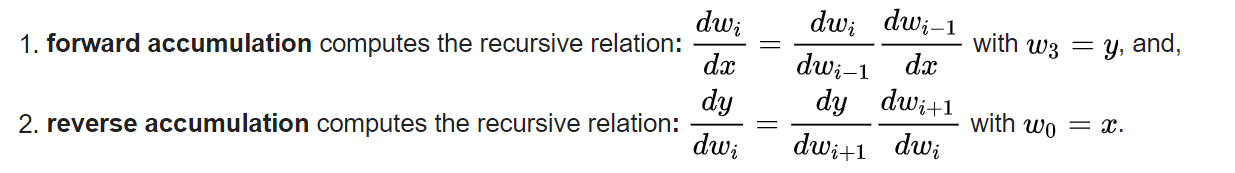

In [5]:
from IPython.display import Image
Image("differentiation order.PNG", width=500, height=500)

We now study how TensorFlow implements differentiation. Recall that to compute weights in ANN, we need to invoke backpropagation, which consists of two phases: forward pass and backward pass. To differentiate automatically, TensorFlow needs to remember what operations happen in what order during the forward pass. Then, during the backward pass, TensorFlow traverses this list of operations in reverse order to compute gradients.

TensorFlow provides the tf.GradientTape() API for automatic differentiation; that is, computing the gradient of a computation with respect to some inputs, usually tf.Variables(). TensorFlow basically "records" relevant operations executed inside the context of tf.GradientTape() onto a "tape". It then uses that tape to compute the gradients of a "recorded" computation using the reverse mode differentiation.

Let's see an example of differentiating  $y=x^{2}+6x$ at value $x=1.5$ for now:

In [13]:
x = tf.Variable(1.5)

with tf.GradientTape() as tape:
    y = x**2+6*x
    
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

9.0

The above example uses scalars, but tf.GradientTape() works as easily on any tensor. Let's make the problem slightly more complicated by computing partial derivatives. Suppose I have a function $y(x,z)=x^{2}+6x-3z^{3}$ at value $x=-2.0$ and $z=2.0$ for now, I want to know the partial derivatives with respect to these variables. To compute multiple gradients over the same computation, we will need to add an argument to indicate a persistent gradient tape. This allows multiple calls to the tape.gradient() method as resources are released when the tape object is garbage collected. To get the gradient with respect to both variables, we can pass both variables as sources to the tape.gradient() method. The tape is flexible about how sources are passed and will accept any nested combination of lists or dictionaries and return the gradient structured the same way:

In [14]:
x = tf.Variable(-2.0)
z = tf.Variable(2.0)

with tf.GradientTape(persistent=True) as tape:
    y = x**2+6*x-3*(z**3)
    
[dy_dx, dy_dz] = tape.gradient(y, [x, z])
print(dy_dx.numpy())
print(dy_dz.numpy())

2.0
-36.0


Let's see another example below treating $(w,b)$ as the parameters that is to be differentiated over:

In [15]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]
print(w.numpy())
print(b.numpy())
print(x)

[[-1.7297562   1.0375825 ]
 [ 0.04758498  0.0996372 ]
 [-0.16341075  0.03504228]]
[0. 0.]
[[1.0, 2.0, 3.0]]


Notice the gradient with respect to each source has the shape of the source:

In [16]:
with tf.GradientTape(persistent=True) as tape:
    y = x @ w + b # the operator "@" means matrix multiplication
    loss = tf.reduce_mean(y**2) # computing the mean of elements across dimensions of a tensor

[dl_dw, dl_db] = tape.gradient(loss, [w, b])
print(dl_dw.shape)
print(y)
print(dl_dw)

(3, 2)
tf.Tensor([[-2.1248186  1.3419838]], shape=(1, 2), dtype=float32)
tf.Tensor(
[[-2.1248186  1.3419838]
 [-4.249637   2.6839676]
 [-6.3744555  4.0259514]], shape=(3, 2), dtype=float32)


Automatic differentiation is a complicated topic. Usually we won't need to program derivatives from scratch. So we won't go much deeper further. But a few other related topics are important. One of them is about controlling what the tape 'watches'. When we create a tape through the instance tf.GradientTape(), we are basically asking TensorFlow to keep track of whatever needs to be recorded for perform differentiation (and backpropagation for deep learning). The most useful application of a gradient 'tape' is when you design a custom layer in your keras model. 

The default behavior is to record all operations after accessing a trainable 'tf.Variable' object. The reasons for this are:
   1. The tape needs to know which operations to record in the forward pass to calculate the gradients in the backwards pass.
   2. The tape holds references to intermediate outputs, so you don't want to record unnecessary operations.
   3. The most common use case involves calculating the gradient of a loss with respect to all a model's trainable variables.

So in order for the tape to work, we need two criteria: 1) we are dealing with a 'tf.Variable' object, and 2) this object must be trainable. If you only have a tensor, or you have a 'tf.Variable' object that is not trainable, then the tape won't pick it up.

For example the following fails to calculate a gradient because the 'tf.Tensor' object is not 'watched' by default, and the 'tf.Variable' object is not trainable. Below, only the variable 'x0' can be picked up correctly by the tape. The rest of them won't:

In [17]:
# A trainable variable
x0 = tf.Variable(3.0, name='x0') # a trainable variale that can be picked up by the tape
x1 = tf.Variable(3.0, name='x1', trainable=False) # this is not a trainable tf.Variable object
x2 = tf.Variable(2.0, name='x2') + 1.0 # this is not a tf.Variable because variable+tensor returns a tensor
x3 = tf.constant(3.0, name='x3') # this is not a variable

with tf.GradientTape() as tape:
    y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

for g in grad:
    print(g)

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


To deal with the issue above, tf.GradientTape() instance provides hooks that give the user control over what is or is not watched. To record gradients with respect to a 'tf.Tensor' object, you need to call GradientTape.watch(x):

In [18]:
v = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(v) # because x is not a tf.Variable object we need to watch it by explicitly stating it
    y = v**2

dy_dv = tape.gradient(y, v)
print(dy_dv.numpy())

6.0


Conversely, to disable the default behavior of watching all 'tf.Variables' objects , we can set 'watch_accessed_variables=False' when creating the gradient tape. Below, the example uses two variables, but only connects the gradient for one of the variables. Since GradientTape.watch() was not called on the variable 'x0', no gradient is computed with respect to it:

In [19]:
x0 = tf.Variable(0.0)
x1 = tf.Variable(10.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(x1)
    y0 = tf.math.sin(x0)
    y1 = tf.nn.softplus(x1)
    y = y0 + y1
    ys = tf.reduce_sum(y)

grad = tape.gradient(ys, {'x0': x0, 'x1': x1})

print('dy/dx0:', grad['x0'])
print('dy/dx1:', grad['x1'].numpy())

del tape # deleting the tape

dy/dx0: None
dy/dx1: 0.9999546


One cautionary note: gradient tapes use memory to store intermediate results, including inputs and outputs, for use during the backwards pass. For efficiency, some operations (like ReLU) don't need to keep their intermediate results and they are pruned during the forward pass. However, if the option 'persistent=True' is invoked for the tape, nothing is discarded and the peak memory usage will be higher.

We can also compute the gradient of the nonscalar targets because a gradient is fundamentally an operation on a scalar. Thus, if you ask for the gradient of multiple targets, the result for each source is the gradient of the sum of the targets, a.k.a. the sum of the gradients of each target. TensorFlow designed the computation in this default manner because it is simple to take the gradient of the sum of a collection of losses, or the gradient of the sum of an element-wise loss calculation when we are dealing with ANNs.

In [20]:
x = tf.Variable(2.0)
with tf.GradientTape() as tape:
    y0 = x**2
    y1 = 1 / x

print(tape.gradient({'y0': y0, 'y1': y1}, x).numpy()) # b/c f'(x)=2x-1/(x^2)=4-0.25=3.75

3.75


Similarly, if the target(s) are not scalar the gradient of the sum is calculated (below the variable $y$ is not a scalar):

In [21]:
x = tf.Variable(2.)

with tf.GradientTape() as tape:
    y = x * [3., 4.]

print(tape.gradient(y, x).numpy())
print(y)

7.0
tf.Tensor([6. 8.], shape=(2,), dtype=float32)


Because tapes record operations as they are executed, Python control flow (using statements such as "if" and "while" for example) can naturally be handled:

In [22]:
x = tf.constant(1.2)

v0 = tf.Variable(2.0)
v1 = tf.Variable(2.0)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    if x > 0.0:
        result = 3*v0
    else:
        result = v1**2-9

dy_dv0, dy_dv1 = tape.gradient(result, [v0, v1])

print(dy_dv0)
print(dy_dv1)

tf.Tensor(3.0, shape=(), dtype=float32)
None


So far, we have seen a lot of 'None' values like the example before, in general, when a target is not connected to a source you will get a gradient of 'None'. Although in many scenarios it's easy to debug and find the cause, but there are certain subtle cases where it's not easy to debug. TensorFlow's official documentation has a few examples. We won't discuss further here (c.f. https://www.tensorflow.org/guide/autodiff). 

### III. Graphs and Functions in TensorFlow

To understand graphs, we first need to go over the concept of eager execution. TensorFlow's **eager execution** is an imperative programming environment that evaluates operations immediately, without building some pre-made 'container' or roadmap: operations return concrete values instead of constructing a computational graph to run later. This makes it easy to get started with TensorFlow and debug models, and it reduces boilerplate as well. In TensorFlow 2.0 version above, eager execution is enabled by default. In other words, eager execution implies that TensorFlow operations are executed by Python, operation by operation, and returning results back to Python. Eager TensorFlow takes advantage of GPUs, allowing you to place variables, tensors, and even operations on GPUs and TPUs. However, running TensorFlow operation-by-operation in Python prevents a host of accelerations otherwise available. This is where graphs play a role in: if you can extract tensor computations from Python, you can make them into a graph. This makes our execution more flexibile in some of the scenarios. 

**TensorFlow Graphs** are data structures that contain a set of 'tf.Operation' objects, which represent units of computation; and 'tf.Tensor' objects, which represent the units of data that flow between operations. They are defined in a 'tf.Graph' context. Since these graphs are data structures, they can be saved, run, and restored all without the original Python code. You can use your TensorFlow graph in environments that don't even have a Python interpreter, like mobile applications, embedded devices, and backend servers. TensorFlow uses graphs as the format for saved models when it exports them from Python. In short, graphs are extremely useful and let your TensorFlow run fast, run in parallel, and run efficiently on multiple devices.

Now let's study how we can create and trace graphs. The way you create a graph in TensorFlow is to use tf.function(), either as a direct call or as a **Python decorator**. Before we move on, let's study Python decorator for a moment, which provides a simple syntax for calling **higher-order functions**. By higher-order function, we mean a function that either 1) takes one or more functions as arguments (i.e. procedural parameters), or 2) returns a function as its result. By definition, a decorator is a function that takes another function and extends the behavior of the latter function without explicitly modifying it.

Here is some jargon in computer science. Python’s functions are in essence **first-class objects**. This means you can assign them to variables, store them in data structures, pass them as arguments to other functions, and even return them as values from other functions. Let's use some examples here. Consider the following 3 functions. Two of the functions are common (say_hello() and be_awesome()) as they are regular in the sense that expect a name given as a string. The greet_bob() function however, expects a function as its argument. We can, for instance, pass it the say_hello() or the be_awesome() function:

In [23]:
def say_hello(name):
    return f"Hello {name}"

def be_awesome(name):
    return f"Yo {name}, together we are the awesomest!"

def greet_bob(greeter_func):
    return greeter_func("Bob")

In [24]:
greet_bob(say_hello)

'Hello Bob'

In [25]:
greet_bob(be_awesome)

'Yo Bob, together we are the awesomest!'

It’s possible to define functions inside other functions. Such functions are called inner functions. Here’s an example of a function with two inner functions. Note that whenever you call parent(), the inner functions first_child() and second_child() are also called. But because of their local scope, they aren’t available outside of the parent() function.

In [26]:
def parent():
    print("Printing from the 'parent()' function")

    def first_child():
        print("Printing from the 'first_child()' function")

    def second_child():
        print("Printing from the 'second_child()' function")

    second_child()
    first_child()
    
parent()

Printing from the 'parent()' function
Printing from the 'second_child()' function
Printing from the 'first_child()' function


Python also allows you to use functions as return values. The following example returns one of the inner functions from the outer parent2() function. Note that you are returning 'first_child' without the parentheses. Recall that this means that you are returning a reference to the function first_child(). In contrast first_child() with parentheses refers to the result of evaluating the function. Compare the result between parent2(1) and parent2(2) below:

In [27]:
def parent2(num):
    def first_child():
        return "Hi, I am Emma"

    def second_child():
        return "Call me Liam"

    if num == 1:
        return first_child # no parenthesis here
    elif num == 2:
        return second_child() # having a parenthesis here
    else: 
        print('Too many kids I can handle!')

In [28]:
parent2(1)

<function __main__.parent2.<locals>.first_child()>

In [29]:
parent2(2)

'Call me Liam'

Now let's create another two object: 'first' and 'second'. And then we can compare. If you call first(), it basically grabs the result of the first inner function. Yet if you call second(), we see that it causes an error. 

In [30]:
first = parent2(1)
second = parent2(2)

In [31]:
first()

'Hi, I am Emma'

In [32]:
try:
    second()
except TypeError:
    print("'str' object is not callable")

'str' object is not callable


In [33]:
second

'Call me Liam'

Now let's create an example to formally introduce decorators. Below, we create a function called my_decorator(), which needs a function as its argument. There is an inner function called wrapper(). Finally, we will create an object called 'say_whee' by calling the function my_decorator with say_whee() as its argument, since say_whee() itself is a function that only prints "whee!":

In [34]:
def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

def say_whee():
    print("Whee!")

say_whee= my_decorator(say_whee) # this is where the decoration happens

In [35]:
say_whee()

Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In [36]:
say_whee

<function __main__.my_decorator.<locals>.wrapper()>

In effect, the name say_whee now points to the wrapper() inner function. Remember that you return wrapper as a function when you call my_decorator(say_whee). Essentially, what happens here is that decorators wrap a function, modifying its behavior. Because the code above is a bit cumbersome, we can use the "pie syntax" that starts with the "@" symbol. So using the example above, @my_decorator is just an easier way of saying say_whee = my_decorator(say_whee). It’s how you apply a decorator to a function:

In [37]:
def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

@my_decorator
def say_whee():
    print("Whee!")

In [38]:
say_whee()

Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In [39]:
say_whee

<function __main__.my_decorator.<locals>.wrapper()>

Now we have understood decorator, which is just another function. Let's go back to TensorFlow. Recall that we can use tf.function() to create a graph, either as a direct call or as a Python decorator. We need to understand what tf.function() does. As we will see, essentially, tf.function() compiles a function into a callable TensorFlow graph. Here is an example:

In [40]:
def function_to_get_faster(x, y, b): # defining a Python function
    x = tf.matmul(x, y)
    x = x + b
    return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster) # creating a special object that contains a graph

x1 = tf.constant([[1.0, 2.0]]) # making some tensors
y1 = tf.constant([[2.0], [3.0]]) # making some tensors
b1 = tf.constant(4.0) # making some tensors

a_function_that_uses_a_graph(x1, y1, b1).numpy() # executing

array([[12.]], dtype=float32)

In TensorFlow, 'tf.function'-ized functions are Python callables that work the same as their Python equivalents. They have a particular class (python.eager.def_function.Function), but to the users they act just as the non-traced version.

In [41]:
a_function_that_uses_a_graph

Basically, tf.function() recursively traces any Python function it calls. It constructs a callable that executes a TensorFlow graph created by trace-compiling the TensorFlow operations in its argument 'func', effectively executing 'func' as a TensorFlow graph. Here is an example using decorators. Note that in the example below, the callable will create a graph that includes inner_function() as well as outer_function():

In [42]:
def inner_function(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x

@tf.function # using the decorator
def outer_function(x):
    y = tf.constant([[2.0], [3.0]])
    b = tf.constant(4.0)
    return inner_function(x, y, b)

outer_function(tf.constant([[1.0, 2.0]])).numpy()

array([[12.]], dtype=float32)

Flow control and loops are converted to TensorFlow via the 'tf.autograph' object by default. Here is an example below. We create a function that takes a numeric input as an argument. If the sum of the tensor is less or equal to 1, we return $x^{2}$. Otherwise, we return x-1. When we create a graph using tf.function(), the control flow logic (if...else...) built within the self-defined function will be carried along. You can directly call the autograph conversion to see how Python is converted into TensorFlow operations. This is, mostly, unreadable, but you can see the transformation:

In [43]:
def my_function(x):
    if tf.reduce_sum(x) <= 1:
        return x * x
    else:
        return x-1

a_function = tf.function(my_function)

print("First branch, with graph:", a_function(tf.constant(1.0)).numpy())
print("Second branch, with graph:", a_function(tf.constant([5.0, 5.0])).numpy())

First branch, with graph: 1.0
Second branch, with graph: [4. 4.]


In [44]:
print(tf.autograph.to_code(my_function))

def tf__my_function(x):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('my_function', 'my_function_scope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as my_function_scope:

    def get_state():
      return ()

    def set_state(_):
      pass

    def if_true():
      do_return = True
      retval_ = my_function_scope.mark_return_value(x * x)
      return retval_, do_return

    def if_false():
      do_return = True
      retval_ = my_function_scope.mark_return_value(x - 1)
      return retval_, do_return
    cond = ag__.converted_call(tf.reduce_sum, my_function_scope.callopts, (x,), None, my_function_scope) <= 1
    retval_, do_return = ag__.if_stmt(cond, if_true, if_false, get_state, set_state, ('retval_', 'do_return'), ())
  do_return,
  return ag__.retval(retval_)



### III. An Example for Training Loop in TensorFlow

We have talked about tensors, variables, and functions in TensorFlow. Now let's try to build a simple linear model in TensorFlow from scratch. So we are not using Keras API in this section because Keras API is already pre-made based on TensorFlow (Keras is certainly not the only API, there are others within TensorFlow such as 'Estimator' API). Abstractly, in the raw TensorFlow platform, a model is a function that computes something on tensors (a forward pass) with some variables that can be updated in response to training. Most models are made of layers. Layers are functions with a known mathematical structure that can be reused and have trainable variables. In TensorFlow, most high-level implementations of layers and models, such as Keras or Sonnet, are built on the same foundational class: 'tf.Module'. Modules and, by extension, layers are deep-learning terminology for "objects": They have internal state, and methods that use that state. To understand how these modules are built, we need a bit of OOP knowledge. For now we will skip this hard part and just focus on basic classes, since TensorFlow already includes the 'tf.Keras' API, a high-level neural network API that provides useful abstractions to reduce boilerplate. 

Solving a machine learning problem usually consists of the following steps:
   - obtain training data
   - define the model and the loss function
   - run through the training data, calculating loss from the ideal value
   - calculate gradients for that loss and use an optimizer to adjust the variables to fit the data
   - evaluate your results
 
For illustration purposes, in this section we'll develop a simple linear model (one covariate with an intercept), which has two variables: weights and bias. First, let's create the dataset of size 1000. The input comes from a normal random sample with normal stochastic errors:

In [45]:
TRUE_W = 3.0 # creating the actual line
TRUE_B = 2.0 # creating the actual line

NUM_EXAMPLES = 1000

x = tf.random.normal(shape=[NUM_EXAMPLES]) # creating vector of random x values

noise = tf.random.normal(shape=[NUM_EXAMPLES]) # generating some stochastic noise

y = x * TRUE_W + TRUE_B + noise # calculating y

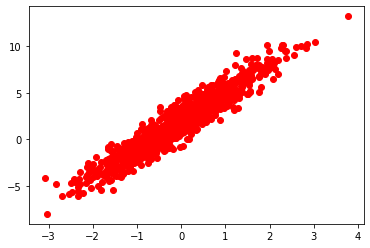

In [46]:
plt.scatter(x, y, color="red")
plt.show()

Tensors are usually gathered together in batches, or groups of inputs and outputs stacked together. Batching can confer some training benefits and works well with accelerators and vectorized computation. Given how small this dataset is, you can treat the entire dataset as a single batch.

Now we need to define the model. To do so, we can use 'tf.Variable' to represent all weights in a model. A 'tf.Variable' object stores a value and provides this in tensor form as needed. Likewise, we can use 'tf.Module' to encapsulate the variables and the computation. We could use any Python object, but this way it can be easily saved. Here, both $w$ and $b$ are variables. For initial values, we use $(w^{(0)},b^{(0)})=(5.0,0.0)$. In practice, these initial values should be randomly chosen. In other words, the initial variables are set here in a fixed way, but Keras comes with any of a number of initalizers we could use:

In [47]:
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(5.0)  # initializing the weights to 5.0 and the bias to 0.0
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.w * x + self.b

model = MyModel()

print("Variables:", model.variables) # listing variables tf.modules's built-in variable aggregation
assert model(3.0).numpy() == 15.0 # verifying the model works, as 3*5+0=15

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


Notice that the code above is an application of OOP. The most abstruse line of code is the one that states 'def \__init\__'. What this does is that it packs all of the keyword arguments used in any given call to 'def \__init\__' into a dictionary object and super(). The statement expands them into keyword arguments again. Its like a wildcard for function parameters. It can be a lazy way to give the subclass the same parameter signature as the parent without bothering to type all of the possible keyword parameters in again. 

To be more specific, the super() builtin returns a proxy object (temporary object of the superclass) that allows us to access methods of the base class. It allows us to avoid using the base class name explicitly. Here is an example. Below. we called the \__init__\() method of the 'Mammal' class (from the 'Dog' class) using code: "super().\__init__\('Dog')" instead of "Mammal.\__init__\(self, 'Dog')".

In [48]:
class Mammal(object):
    def __init__(self, mammalName):
        print(mammalName, 'is a warm-blooded animal.')
    
class Dog(Mammal):
    def __init__(self):
        print('Dog has four legs.')
        super().__init__('Dog')
    
d1 = Dog()

Dog has four legs.
Dog is a warm-blooded animal.


Now going back to the simple linear regression example, we are done with creating a model instance, and so now we will need to define the loss function. Below, this computes a single loss value for an entire batch. Moreover, before training the model, we can visualize the loss value by plotting the model's predictions in orange and the training data in blue:

Current loss: 9.365562


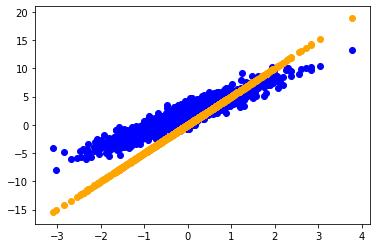

In [49]:
def loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))
print("Current loss: %1.6f" % loss(model(x), y).numpy())

plt.scatter(x, y, c="blue")
plt.scatter(x, model(x), c="orange")
plt.show()

Now let's define a training loop. Here we are not trying to find an explicit solution using the normal equation. We want to use an iterative approach. The training loop consists of repeatedly doing three tasks in order:

   1. Sending a batch of inputs through the model to generate outputs
   2. Calculating the loss by comparing the outputs to the output (or label)
   3. Using gradient tape to find the gradients
   4. Optimizing the variables with those gradients

For this example, we will train the model using gradient descent. Notice that there are many variants of the gradient descent scheme that are captured in 'tf.keras.optimizers' (see here: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). But in the spirit of building from first principles, here we will implement the basic math ourselves with the help of 'tf.GradientTape' for automatic differentiation and tf.assign_sub() for decrementing a value (which combines tf.assign() and tf.sub()):

In [50]:
def train(model, x, y, learning_rate): # given a callable model, inputs, outputs, and a learning rate
    with tf.GradientTape() as tape:
        current_loss = loss(y, model(x)) # trainable variables are automatically tracked by the tape
    dl_dw, dl_db = tape.gradient(current_loss, [model.w, model.b]) # using the tape to obtain gradients 
    model.w.assign_sub(learning_rate * dl_dw) # subtracting the gradient scaled by the learning rate
    model.b.assign_sub(learning_rate * dl_db) # subtracting the gradient scaled by the learning rate

For a look at training, you can send the same batch of x an y through the training loop, and see how the parameters evolve:

In [51]:
model = MyModel()

ws, bs = [], [] # collecting the history of w-values and b-values to plot later
epochs = range(10)

def training_loop(model, x, y): # defining a training loop
    for epoch in epochs:
        train(model, x, y, learning_rate=0.1) # uppdating the model with the single giant batch
        ws.append(model.w.numpy()) # tracking this before update
        bs.append(model.b.numpy()) # tracking this before update
        current_loss = loss(y, model(x))

    print("Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f" %
          (epoch, ws[-1], bs[-1], current_loss))

In [52]:
print((model.w, model.b, loss(y, model(x))))
training_loop(model, x, y) # doing the training now

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Tensor: id=588, shape=(), dtype=float32, numpy=9.365562>)
Epoch  9: w=3.17 b=1.79, loss=1.02606


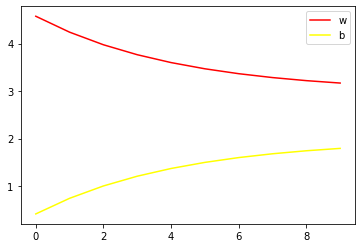

In [53]:
plt.plot(epochs, ws, "red",
         epochs, bs, "yellow")

plt.legend(["w", "b"])
plt.show()

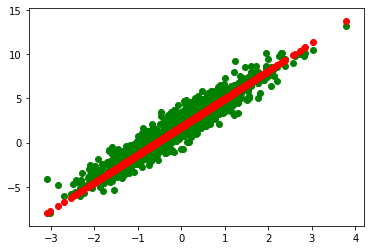

Current loss: 1.026057


In [54]:
# Visualize how the trained model performs
plt.scatter(x, y, c="green")
plt.scatter(x, model(x), c="r")
plt.show()
print("Current loss: %1.6f" % loss(model(x), y).numpy())

This closes the training loop in the example above. There is another way to achieve the desired result. It's useful to contrast the code above with the equivalent in Keras. Defining the model looks exactly the same if you subclass tf.keras.Model. Remember that Keras models inherit ultimately from 'tf.module'.

In [55]:
class MyModelKeras(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x, **kwargs):
        return self.w * x + self.b

keras_model = MyModelKeras()

training_loop(keras_model, x, y) # reusing the training loop with a Keras model

Epoch  9: w=3.17 b=1.79, loss=1.02606


Rather than write new training loops each time we create a model, we can use the built-in features of Keras as a shortcut. This can be useful when we do not want to write or debug Python training loops. If we do, we will need to use model.compile() to set the parameters, and model.fit() to train. It can be less code to use Keras implementations of $L_{2}$ loss and gradient descent, again as a shortcut. Keras losses and optimizers can be used outside of these convenience functions, too, and the previous example could have used them.

Keras fit() method expects batched data or a complete dataset as a 'numpy' array. These arrays are chopped into batches and default to a batch size of 32. In this case, to match the behavior of the hand-written loop, you should pass x in as a single batch of size 1000:

In [56]:
keras_model2 = MyModelKeras()

keras_model2.compile(run_eagerly=False,
                     optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                     loss=tf.keras.losses.mean_squared_error)
# compiling sets the training paramaeters
# by default, fit() uses tf.function()
# we can turn that off for debugging, but it is on now

print(x.shape[0])

1000


In [57]:
keras_model2.fit(x, y, epochs=10, batch_size=1000)

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 1s 1ms/sample - loss: 9.3656
Epoch 2/10
1000/1000 [==============================] - 0s 10us/sample - loss: 6.2051
Epoch 3/10
1000/1000 [==============================] - 0s 5us/sample - loss: 4.2316
Epoch 4/10
1000/1000 [==============================] - 0s 2us/sample - loss: 2.9992
Epoch 5/10
1000/1000 [==============================] - 0s 2us/sample - loss: 2.2297
Epoch 6/10
1000/1000 [==============================] - 0s 3us/sample - loss: 1.7492
Epoch 7/10
1000/1000 [==============================] - 0s 2us/sample - loss: 1.4491
Epoch 8/10
1000/1000 [==============================] - 0s 3us/sample - loss: 1.2617
Epoch 9/10
1000/1000 [==============================] - 0s 2us/sample - loss: 1.1447
Epoch 10/10
1000/1000 [==============================] - 0s 6us/sample - loss: 1.0717


#### References:
   - Izen,an, A.J. (2008) Modern Multivariate Statistical Techniques: Regression, Classification, and Manifold Learning",New York: Springer. 
   - Hastie, T., Hastie, T., Tibshirani, R., & Friedman, J. H. (2001). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. New York: Springer.
   - Francois Chollet (2017). Deep Learning with Python. Manning Publications Co.
   - https://www.tensorflow.org/guide
   - https://www.tensorflow.org/guide/variable
   - https://www.tensorflow.org/guide/autodiff
   - https://www.tensorflow.org/guide/intro_to_graphs
   - https://www.tensorflow.org/guide/basic_training_loops
   - https://www.tensorflow.org/guide/migrate
   - https://docs.w3cub.com/tensorflow~python/
   - http://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/
   - https://cs231n.github.io/optimization-2/
   - https://realpython.com/primer-on-python-decorators/
   - https://missinglink.ai/guides/neural-network-concepts/backpropagation-neural-networks-process-examples-code-minus-math/
   - https://nbviewer.jupyter.org/url/www.cs.toronto.edu/~rgrosse/courses/csc321_2018/tutorials/tut4.ipynb